In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import seaborn as sns

from timeseries import plot_ts

In [53]:
data = pd.read_parquet("../data/04_sample/target/0.pq")

In [54]:
data

,ClaimNb_TRG,ClaimFreq_TRG,ClaimSeverity_TRG,ClaimTotalAmount_TRG,ClaimPurePremium_TRG,Exposure
IDpol,,,,,,
139,1,1.333333,303.00,303.00,404.000000,0.750000
424,2,3.225806,5417.00,10834.00,17474.193548,0.620000
448,0,0.000000,0.00,0.00,0.000000,0.130000
622,1,1.333333,1397.97,1397.97,1863.960000,0.750000
647,0,0.000000,0.00,0.00,0.000000,0.510000
...,...,...,...,...,...,...
6114183,0,0.000000,0.00,0.00,0.000000,0.050000
6114186,0,0.000000,0.00,0.00,0.000000,0.040000
6114240,0,0.000000,0.00,0.00,0.000000,0.030000


In [8]:
data = pd.read_parquet("../data/03_primary/targets.pq")

In [10]:
data = data[data.ClaimNb_TRG > 0]

In [11]:
data.ClaimSeverity_TRG

,ClaimNb_TRG,ClaimFreq_TRG,ClaimSeverity_TRG,ClaimTotalAmount_TRG,ClaimPurePremium_TRG,Exposure
IDpol,,,,,,
139,1,1.333333,303.00,303.00,404.000000,0.75
190,1,7.142857,1981.84,1981.84,14156.000000,0.14
414,1,7.142857,1456.55,1456.55,10403.928571,0.14
424,2,3.225806,5417.00,10834.00,17474.193548,0.62
463,1,3.225806,3986.67,3986.67,12860.225806,0.31
...,...,...,...,...,...,...
6113521,1,5.555556,1324.40,1324.40,7357.777778,0.18
6113793,1,7.142857,1769.88,1769.88,12642.000000,0.14
6113817,1,5.882353,1288.28,1288.28,7578.117647,0.17


In [19]:
quantiles = list(np.arange(0, 1, 0.1))
np.quantile(data.ClaimSeverity_TRG, quantiles)

array([1.00000e+00, 2.08775e+02, 5.86000e+02, 9.32945e+02, 1.12812e+03,
       1.17200e+03, 1.20400e+03, 1.20400e+03, 1.48123e+03, 2.73651e+03])

In [20]:
quantiles = list(np.arange(0.9, 1, 0.01))
np.quantile(data.ClaimSeverity_TRG, quantiles)

array([ 2736.51   ,  3000.     ,  3204.     ,  3608.779  ,  4060.583  ,
        4649.95625,  5437.74   ,  6907.3345 ,  9331.696  , 16328.36975])

In [21]:
quantiles = list(np.arange(0.99, 1, 0.001))
np.quantile(data.ClaimSeverity_TRG, quantiles)

array([  16328.36975   ,   18103.70295   ,   20068.5702    ,
         23042.9443    ,   26605.6367    ,   34578.88925   ,
         41729.8974    ,   54639.2956    ,   73234.386     ,
        133337.62834999, 4075400.56      ])

In [24]:
x = data[data.ClaimSeverity_TRG > 73234.386].ClaimSeverity_TRG.sort_values()

In [43]:
len(x)

250

In [25]:
x

IDpol
85926        74784.900
109729       74966.230
3234374      75000.000
105098       76333.195
4073213      77538.575
3097066      78104.830
175126       85442.210
5055089      85552.270
3068252      86719.200
2101212      92149.000
43832        96422.320
5033465     100572.500
2070262     105119.665
2205491     109743.720
3041107     114759.950
28509       115232.880
2125576     115484.110
30738       116318.900
4167474     118000.000
2226904     120000.000
1017853     121959.210
5068147     125847.050
2209888     128902.060
1043258     132628.120
2008127     133071.220
154968      137169.810
1107370     152084.960
4138268     181204.000
3083780     182050.000
3172846     182500.000
2096700     182878.180
53865       183073.660
3196736     186584.150
3025890     191477.570
2202813     203172.000
1067220     205432.050
3059946     208472.600
3103319     209695.870
4159792     211204.000
2206511     241171.160
1096763     255013.030
4169019     276643.000
3150210     281897.490
30758

In [27]:
len(x)

50

<Axes: xlabel='category', ylabel='values'>

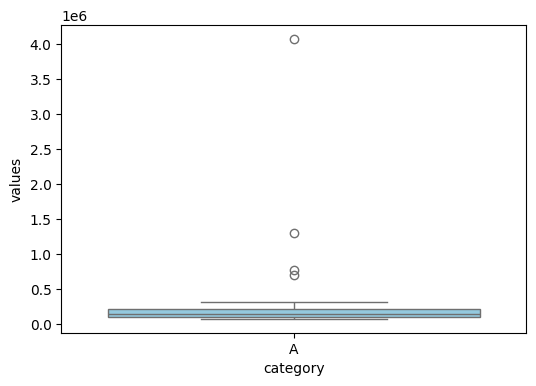

In [26]:
df = pd.DataFrame({"values": x, "category": ["A"] * len(x)})  # Single category

# Create Seaborn boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x="category", y="values", data=df, color="skyblue")

In [35]:
from scipy.stats import iqr

th = np.quantile(data.ClaimSeverity_TRG, 0.99)
x = data.ClaimSeverity_TRG[data.ClaimSeverity_TRG >= th]

# Compute IQR directly
iqr_value = iqr(x)
print(f"{iqr_value=}")
q3 = np.quantile(x, 0.75)
print(f"{q3=}")
q3_plus_15_iqr = q3 + 1.5 * iqr_value
print(f"{q3_plus_15_iqr=}")

iqr_value=44968.45
q3=66450.1375
q3_plus_15_iqr=133902.8125


<Axes: xlabel='category', ylabel='values'>

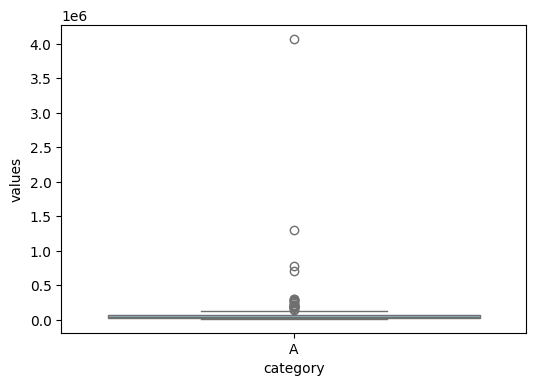

In [36]:
df = pd.DataFrame({"values": x, "category": ["A"] * len(x)})  # Single category

# Create Seaborn boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x="category", y="values", data=df, color="skyblue")

In [37]:
data.ClaimSeverity_TRG[data.ClaimSeverity_TRG > q3_plus_15_iqr].sort_values()

IDpol
154968      137169.81
1107370     152084.96
4138268     181204.00
3083780     182050.00
3172846     182500.00
2096700     182878.18
53865       183073.66
3196736     186584.15
3025890     191477.57
2202813     203172.00
1067220     205432.05
3059946     208472.60
3103319     209695.87
4159792     211204.00
2206511     241171.16
1096763     255013.03
4169019     276643.00
3150210     281897.49
3075820     287423.00
158309      301635.49
1117644     307096.42
110846      702092.76
3122016     774411.50
2141337    1301172.60
1120377    4075400.56
Name: ClaimSeverity_TRG, dtype: float64

In [46]:
s = data.ClaimSeverity_TRG.sum()
s

55390041.56000001

In [45]:
data.ClaimSeverity_TRG[data.ClaimSeverity_TRG > s * 0.001].sort_values()

IDpol
2166718      56219.60
1080933      58711.00
4146144      61204.00
4037514      61469.00
2211587      62400.00
              ...    
1117644     307096.42
110846      702092.76
3122016     774411.50
2141337    1301172.60
1120377    4075400.56
Name: ClaimSeverity_TRG, Length: 73, dtype: float64

In [50]:
x = data.ClaimSeverity_TRG.sort_values()
while len(x) > 0 and x.iloc[-1] > 0.01 * x.sum():
    x = x.iloc[:-1]
print(len(x))
x

24932


IDpol
1031713         1.00
2054554         1.09
175914          1.49
3191712         1.59
3120081         1.74
             ...    
4169019    276643.00
3150210    281897.49
3075820    287423.00
158309     301635.49
1117644    307096.42
Name: ClaimSeverity_TRG, Length: 24932, dtype: float64

In [ ]:
3097066      78104.830
3025890     191477.570
3122016     774411.500
2141337    1301172.600

In [ ]:
np.quantile(data.ClaimSeverity_TRG, quantiles)

In [13]:
def target_percs(data, only_positive=False, trg_var="ClaimFreq", vals_and_ops=None):
    if vals_and_ops is None:
        vals_and_ops = [(0, "≥"), (0, ">"), (1, "≥"), (1, ">")] + list(zip([1.5, 2, 3, 5, 7] + list(range(10, 110, 10)) + [150, 200, 250, 300, 350, 400], [">"] * 100))
    if only_positive:
        vals_and_ops = vals_and_ops[1:]
        data = data[data[trg_var] > 0]
    n = len(data)
    rows = []
    for t, op in vals_and_ops:
        if op == "≥":
            cnt = (data[trg_var] >= t).sum()
        else:
            cnt = (data[trg_var] > t).sum()
        thrhs = f"{trg_var} {op} {t:3}".replace(" ", " ")
        rows.append((thrhs, cnt, round(100 * cnt/n, 2)))
    df = pd.DataFrame(rows, columns=["Threshold", "Samples", "Percentage"])
    return df

In [15]:
vals_and_ops = [(0, "≥"), (0, ">"), (1, "≥"), (1, ">")] + list(zip([1.5, 2, 3, 5, 7] + list(range(10, 110, 10)) + [150, 200, 250, 300, 350, 400], [">"] * 100))
target_percs(data, trg_var="ClaimSeverity_TRG", vals_and_ops=vals_and_ops)

,Threshold,Samples,Percentage
0,ClaimSeverity_TRG ≥ 0,24936,100.00
1,ClaimSeverity_TRG > 0,24936,100.00
2,ClaimSeverity_TRG ≥ 1,24936,100.00
3,ClaimSeverity_TRG > 1,24935,100.00
4,ClaimSeverity_TRG > 1.5,24933,99.99
5,ClaimSeverity_TRG > 2,24928,99.97
6,ClaimSeverity_TRG > 3,24926,99.96
7,ClaimSeverity_TRG > 5,24920,99.94
8,ClaimSeverity_TRG > 7,24904,99.87
9,ClaimSeverity_TRG > 10,24889,99.81
